In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
umbrella = np.array([125,153,106,88,118,
                     161,133,102,138,144,
                     113,80,109,137,125,
                     109,130,165,128,96])
quarter = np.array([1,2,3,4]*5)

In [3]:
ts = pd.DataFrame({'quarter':quarter,
                   'sales':umbrella})
ts

,quarter,sales
0,1,125
1,2,153
2,3,106
3,4,88
4,1,118
5,2,161
6,3,133
7,4,102
8,1,138
9,2,144


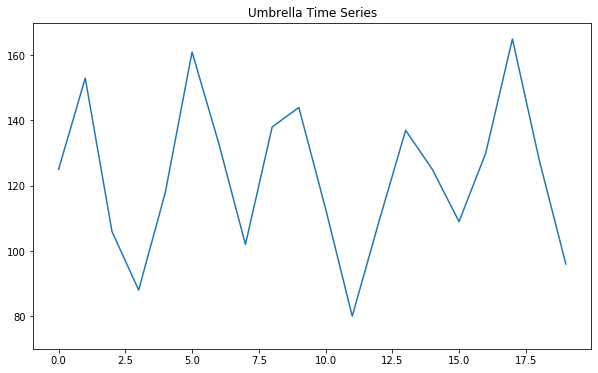

In [4]:
plt.figure(figsize=(10,6))
plt.title('Umbrella Time Series')
plt.plot(umbrella)
plt.ylim(70,170)
plt.show()

# simple forecasting

In [5]:
q_mean = {}
for i in range(4):
    q_mean[f'Q{i+1}']=ts.sales[ts.quarter==i+1].mean()
q_mean

{'Q1': 124.0, 'Q2': 152.0, 'Q3': 121.0, 'Q4': 95.0}

# forecasting with multiple regression

In [6]:
q1_col = np.array([1,0,0,0]*5)
q2_col = np.array([0,1,0,0]*5)
q3_col = np.array([0,0,1,0]*5)

In [7]:
ts['q1_col'] = q1_col
ts['q2_col'] = q2_col
ts['q3_col'] = q3_col

In [8]:
ts

,quarter,sales,q1_col,q2_col,q3_col
0,1,125,1,0,0
1,2,153,0,1,0
2,3,106,0,0,1
3,4,88,0,0,0
4,1,118,1,0,0
5,2,161,0,1,0
6,3,133,0,0,1
7,4,102,0,0,0
8,1,138,1,0,0
9,2,144,0,1,0


In [9]:
import statsmodels.api as sm

In [10]:
y = ts.sales
x = ts[['q1_col','q2_col','q3_col']]
x = sm.add_constant(x)
lmfit = sm.OLS(y,x).fit()
lmfit.summary()

C:\Users\sundooedu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     21.18
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           8.10e-06
Time:                        16:44:00   Log-Likelihood:                -74.687
No. Observations:                  20   AIC:                             157.4
Df Residuals:                      16   BIC:                             161.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.0000      5.065     18.758      0.000      84.264     105.736
q1_col        29.0000      7.162      4.049      0.001      13.816      44.184
q2_col        57.0000      7.162      7.958      0.000      41.816      72.184
q3_col        26.0000      7.162      3.630      0.002      10.816      41.184
==============================================================================
Omnibus:                        4.596   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                1.576
Skew:                          -0.191   Prob(JB):                        0.455
Kurtosis:                       1.679   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lmfit.params

const     95.0
q1_col    29.0
q2_col    57.0
q3_col    26.0
dtype: float64

### sales = lmfit.params[0] + lmfit.params[1]*q1 + lmfit.params[2]*q2 + lmfit.params[3]*q3

In [12]:
q1_m = lmfit.params[0] + lmfit.params[1]*1+ lmfit.params[2]*0 + lmfit.params[3]*0
q2_m = lmfit.params[0] + lmfit.params[1]*0+ lmfit.params[2]*1 + lmfit.params[3]*0
q3_m = lmfit.params[0] + lmfit.params[1]*0+ lmfit.params[2]*0 + lmfit.params[3]*1
q4_m = lmfit.params[0] + lmfit.params[1]*0+ lmfit.params[2]*0 + lmfit.params[3]*0

In [13]:
def q_print(a,b,c,d):
    print(f'a:{a}')
    print(f'b:{b}')
    print(f'c:{c}')
    print(f'd:{d}')

In [14]:
q_print(q1_m,q2_m,q3_m,q4_m)

a:123.99999999999996
b:151.99999999999991
c:120.99999999999997
d:94.99999999999996


# TV SET example

In [15]:
tv=np.array([4.8,4.1,6,6.5,
             5.8,5.2,6.8,7.4,
             6,5.6,7.5,7.8,
             6.3,5.9,8,8.4])

In [16]:
q1_col = np.array([1,0,0,0]*4)
q2_col = np.array([0,1,0,0]*4)
q3_col = np.array([0,0,1,0]*4)

In [17]:
time = np.arange(1,17)

In [18]:
ts = pd.DataFrame({'sales':tv})
ts

,sales
0,4.8
1,4.1
2,6.0
3,6.5
4,5.8
5,5.2
6,6.8
7,7.4
8,6.0
9,5.6


In [19]:
ts['q1_col'] = q1_col
ts['q2_col'] = q2_col
ts['q3_col'] = q3_col
ts['time'] = time
ts

,sales,q1_col,q2_col,q3_col,time
0,4.8,1,0,0,1
1,4.1,0,1,0,2
2,6.0,0,0,1,3
3,6.5,0,0,0,4
4,5.8,1,0,0,5
5,5.2,0,1,0,6
6,6.8,0,0,1,7
7,7.4,0,0,0,8
8,6.0,1,0,0,9
9,5.6,0,1,0,10


# time series chart

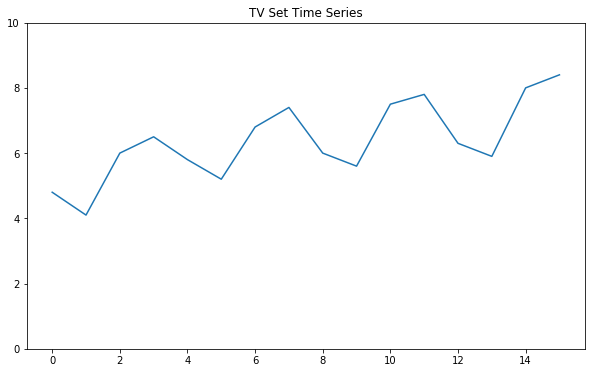

In [20]:
plt.figure(figsize=(10,6))
plt.title('TV Set Time Series')
plt.plot(tv)
plt.ylim(0,10)
plt.show()

# multiple regression

In [21]:
y = ts.sales
x = ts[['q1_col','q2_col','q3_col','time']]
x = sm.add_constant(x)
lmfit_tv = sm.OLS(y,x).fit()
lmfit_tv.summary()

C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     113.2
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           7.38e-09
Time:                        16:44:00   Log-Likelihood:                 4.7651
No. Observations:                  16   AIC:                            0.4699
Df Residuals:                      11   BIC:                             4.333
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0688      0.162     37.347      0.000       5.711       6.426
q1_col        -1.3631      0.157     -8.657      0.000      -1.710      -1.017
q2_col        -2.0337      0.155    -13.112      0.000      -2.375      -1.692
q3_col        -0.3044      0.154     -1.981      0.073      -0.643       0.034
time           0.1456      0.012     12.023      0.000       0.119       0.172
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.462
Skew:                           0.291   Prob(JB):                        0.794
Kurtosis:                       2.405   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lmfit_tv.params

const     6.068750
q1_col   -1.363125
q2_col   -2.033750
q3_col   -0.304375
time      0.145625
dtype: float64

##### sales = lmfit_tv.params[0] + lmfit_tv.params[1]*q1 + lmfit_tv.params[2]*q2 + lmfit_tv.params[3]*q3 + lmfit_tv.params[4]*time

In [23]:
q1_tv = lmfit_tv.params[0] + lmfit_tv.params[1]*1 + lmfit_tv.params[2]*0 + lmfit_tv.params[3]*0 + lmfit_tv.params[4]*17
q2_tv = lmfit_tv.params[0] + lmfit_tv.params[1]*0 + lmfit_tv.params[2]*1 + lmfit_tv.params[3]*0 + lmfit_tv.params[4]*18
q3_tv = lmfit_tv.params[0] + lmfit_tv.params[1]*0 + lmfit_tv.params[2]*0 + lmfit_tv.params[3]*1 + lmfit_tv.params[4]*19
q4_tv = lmfit_tv.params[0] + lmfit_tv.params[1]*0 + lmfit_tv.params[2]*0 + lmfit_tv.params[3]*0 + lmfit_tv.params[4]*20

In [24]:
q_print(q1_tv,q2_tv,q3_tv,q4_tv)

a:7.1812499999999915
b:6.6562499999999964
c:8.531250000000002
d:8.981249999999989


In [25]:
y_pred = lmfit_tv.predict(x)
y_pred

0     4.85125
1     4.32625
2     6.20125
3     6.65125
4     5.43375
5     4.90875
6     6.78375
7     7.23375
8     6.01625
9     5.49125
10    7.36625
11    7.81625
12    6.59875
13    6.07375
14    7.94875
15    8.39875
dtype: float64

# forecast chart

([<matplotlib.axis.XTick at 0x145a9ad8908>,
 <a list of 16 Text xticklabel objects>)

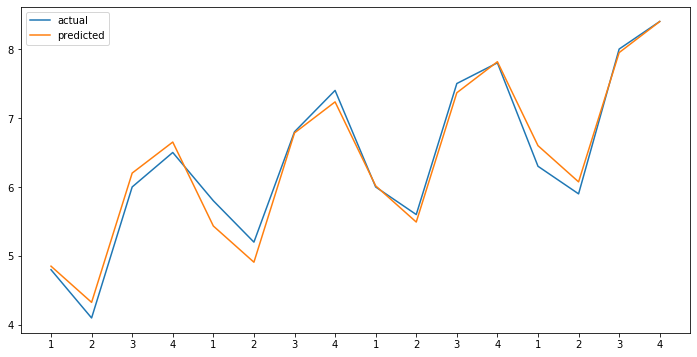

In [26]:
plt.figure(figsize=(12,6))
plt.plot(y, label='actual')
plt.plot(y_pred, label = 'predicted')
plt.legend()
plt.xticks(np.arange(16), np.array([1,2,3,4]*4))

# souvenior shop example

In [27]:
souv = pd.read_csv('https://robjhyndman.com/tsdldata/data/fancy.dat',header=None)
souv

,0
0,1664.81
1,2397.53
2,2840.71
3,3547.29
4,3752.96
...,...
79,28586.52
80,30505.41
81,30821.33
82,46634.38


In [28]:
t = pd.date_range('1/1/1987','12/31/1993', freq='M')
t

DatetimeIndex(['1987-01-31', '1987-02-28', '1987-03-31', '1987-04-30',
               '1987-05-31', '1987-06-30', '1987-07-31', '1987-08-31',
               '1987-09-30', '1987-10-31', '1987-11-30', '1987-12-31',
               '1988-01-31', '1988-02-29', '1988-03-31', '1988-04-30',
               '1988-05-31', '1988-06-30', '1988-07-31', '1988-08-31',
               '1988-09-30', '1988-10-31', '1988-11-30', '1988-12-31',
               '1989-01-31', '1989-02-28', '1989-03-31', '1989-04-30',
               '1989-05-31', '1989-06-30', '1989-07-31', '1989-08-31',
               '1989-09-30', '1989-10-31', '1989-11-30', '1989-12-31',
               '1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31', '1990-11-30', '1990-12-31',
               '1991-01-31', '1991-02-28', '1991-03-31', '1991-04-30',
               '1991-05-31', '1991-06-30', '1991-07-31', '1991-08-31',
      

### index 바꾸기

In [29]:
souv.index = t
souv

,0
1987-01-31,1664.81
1987-02-28,2397.53
1987-03-31,2840.71
1987-04-30,3547.29
1987-05-31,3752.96
...,...
1993-08-31,28586.52
1993-09-30,30505.41
1993-10-31,30821.33
1993-11-30,46634.38


### 컬럼명 바꾸기

In [30]:
souv.columns = ['sales']
souv

,sales
1987-01-31,1664.81
1987-02-28,2397.53
1987-03-31,2840.71
1987-04-30,3547.29
1987-05-31,3752.96
...,...
1993-08-31,28586.52
1993-09-30,30505.41
1993-10-31,30821.33
1993-11-30,46634.38


In [31]:
ts = souv.sales

C:\Users\sundooedu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


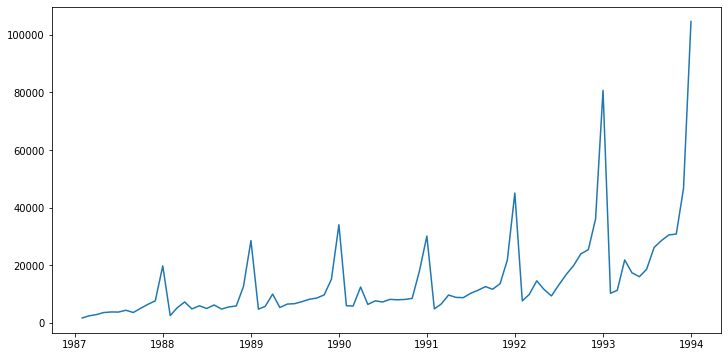

In [32]:
plt.figure(figsize=(12,6))
plt.plot(ts)

## log transformation

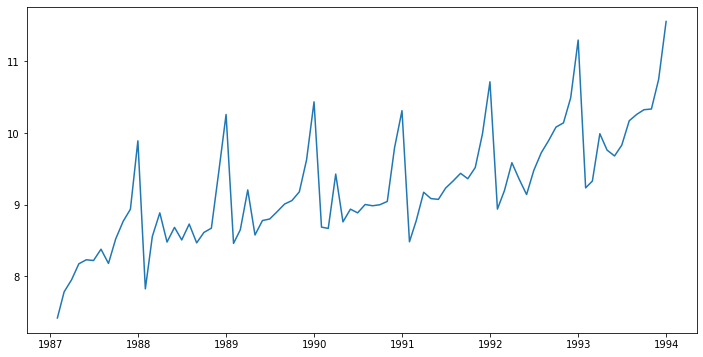

In [33]:
ts_log = np.log(ts) 
plt.figure(figsize=(12,6))
plt.plot(ts_log) # 증폭

# decompose

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
decomp = seasonal_decompose(ts_log)
decomp

In [36]:
seasonal = decomp.seasonal
seasonal

1987-01-31   -0.616744
1987-02-28   -0.385435
1987-03-31    0.103629
1987-04-30   -0.295005
1987-05-31   -0.272525
                ...   
1993-08-31   -0.108738
1993-09-30   -0.023856
1993-10-31    0.066002
1993-11-30    0.537490
1993-12-31    1.288602
Freq: M, Name: sales, Length: 84, dtype: float64

In [37]:
trend = decomp.trend
trend

1987-01-31   NaN
1987-02-28   NaN
1987-03-31   NaN
1987-04-30   NaN
1987-05-31   NaN
              ..
1993-08-31   NaN
1993-09-30   NaN
1993-10-31   NaN
1993-11-30   NaN
1993-12-31   NaN
Freq: M, Name: sales, Length: 84, dtype: float64

In [38]:
resid = decomp.resid
resid 

1987-01-31   NaN
1987-02-28   NaN
1987-03-31   NaN
1987-04-30   NaN
1987-05-31   NaN
              ..
1993-08-31   NaN
1993-09-30   NaN
1993-10-31   NaN
1993-11-30   NaN
1993-12-31   NaN
Freq: M, Name: sales, Length: 84, dtype: float64

## 계절 패턴 요소 제거시 추세가 있는 그래프로 바뀜.

In [39]:
ts_adj = ts_log - seasonal # 계절성 제거

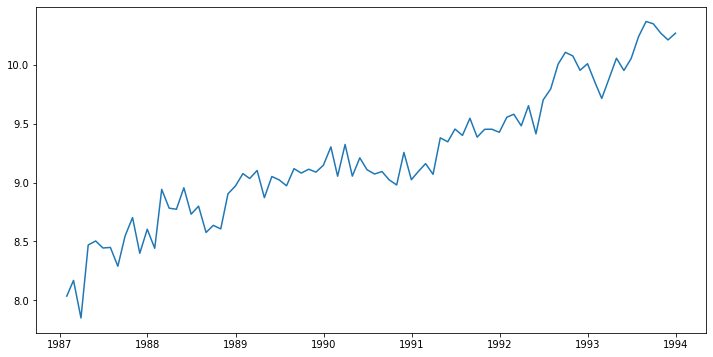

In [40]:
plt.figure(figsize=(12,6))
plt.plot(ts_adj)

In [41]:
y = ts_adj
x = np.arange(1, len(y)+1)

In [42]:
x = sm.add_constant(x)
lmfit_souv = sm.OLS(y,x).fit() # 회귀분석
lmfit_souv.params

const    8.263607
x1       0.022503
dtype: float64

In [43]:
y_adj_pred = lmfit_souv.predict(x)
y_adj_pred

array([ 8.28611012,  8.30861346,  8.3311168 ,  8.35362015,  8.37612349,
        8.39862683,  8.42113017,  8.44363351,  8.46613685,  8.48864019,
        8.51114353,  8.53364687,  8.55615021,  8.57865355,  8.60115689,
        8.62366023,  8.64616357,  8.66866691,  8.69117025,  8.71367359,
        8.73617693,  8.75868027,  8.78118361,  8.80368695,  8.82619029,
        8.84869363,  8.87119697,  8.89370031,  8.91620366,  8.938707  ,
        8.96121034,  8.98371368,  9.00621702,  9.02872036,  9.0512237 ,
        9.07372704,  9.09623038,  9.11873372,  9.14123706,  9.1637404 ,
        9.18624374,  9.20874708,  9.23125042,  9.25375376,  9.2762571 ,
        9.29876044,  9.32126378,  9.34376712,  9.36627046,  9.3887738 ,
        9.41127714,  9.43378048,  9.45628382,  9.47878717,  9.50129051,
        9.52379385,  9.54629719,  9.56880053,  9.59130387,  9.61380721,
        9.63631055,  9.65881389,  9.68131723,  9.70382057,  9.72632391,
        9.74882725,  9.77133059,  9.79383393,  9.81633727,  9.83

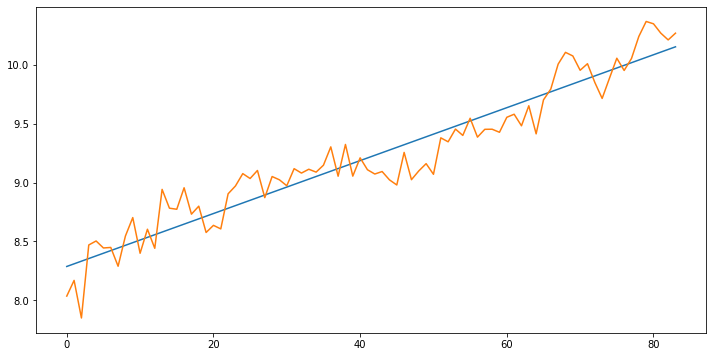

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_adj_pred)
plt.plot(ts_adj.values) # 데이터 타입 고려해서 values 값만 뽑아서 쓴다.

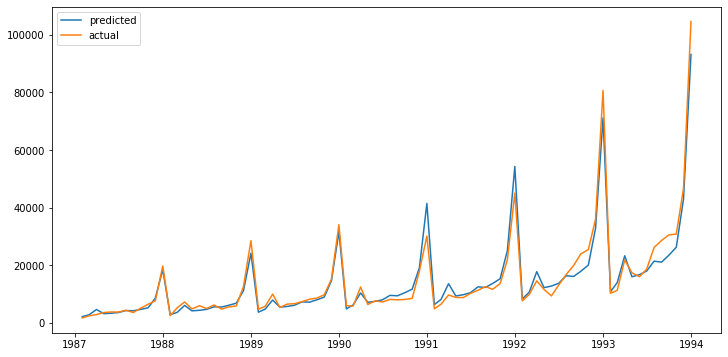

In [45]:
# 계절성추가, 지수변환
y_pred = np.exp(y_adj_pred + seasonal) # 예측값에 시즈널 데이터 더한 후 np.exp() 함수에 넣으면 transformation 되어 y_pred 얻게됨.

plt.figure(figsize=(12,6))
plt.plot(y_pred, label='predicted')
plt.plot(ts, label='actual')
plt.legend(loc='best')

In [46]:
test_data = np.arange(85,97)
test_data = sm.add_constant(test_data)
y94 = np.exp(lmfit_souv.predict(test_data)+seasonal[:12]) # 94년 월별 매출
y94

1987-01-31     14180.834932
1987-02-28     18278.106414
1987-03-31     30486.094579
1987-04-30     20929.096975
1987-05-31     21892.055826
1987-06-30     23517.504912
1987-07-31     28040.345842
1987-08-31     27589.100659
1987-09-30     30716.678234
1987-10-31     34369.422007
1987-11-30     56326.125112
1987-12-31    122091.864310
Freq: M, Name: sales, dtype: float64

In [47]:
y94.index = pd.date_range('1/1/1994','12/31/1994', freq='M')
y94

1994-01-31     14180.834932
1994-02-28     18278.106414
1994-03-31     30486.094579
1994-04-30     20929.096975
1994-05-31     21892.055826
1994-06-30     23517.504912
1994-07-31     28040.345842
1994-08-31     27589.100659
1994-09-30     30716.678234
1994-10-31     34369.422007
1994-11-30     56326.125112
1994-12-31    122091.864310
Freq: M, Name: sales, dtype: float64

In [48]:
test_plus = np.arange(83,85)
test_plus = sm.add_constant(test_plus)
y93 = np.exp(lmfit_souv.predict(test_plus)+seasonal[10:12])
y93

1987-11-30    42996.485367
1987-12-31    93198.689716
Freq: M, Name: sales, dtype: float64

In [49]:
y93.index = pd.date_range('11/1/1993','12/31/1993',freq='M')
y93

1993-11-30    42996.485367
1993-12-31    93198.689716
Freq: M, Name: sales, dtype: float64

In [50]:
simple_plus = pd.concat([y93,y94])
simple_plus

1993-11-30     42996.485367
1993-12-31     93198.689716
1994-01-31     14180.834932
1994-02-28     18278.106414
1994-03-31     30486.094579
1994-04-30     20929.096975
1994-05-31     21892.055826
1994-06-30     23517.504912
1994-07-31     28040.345842
1994-08-31     27589.100659
1994-09-30     30716.678234
1994-10-31     34369.422007
1994-11-30     56326.125112
1994-12-31    122091.864310
Name: sales, dtype: float64

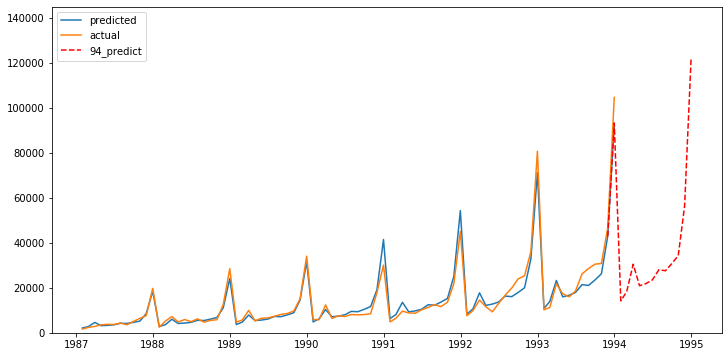

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_pred, label='predicted')
plt.plot(ts, label = 'actual')
plt.plot(simple_plus,'r--',label='94_predict')
plt.ylim(0,145000)
plt.legend(loc='best')

# Lawn-Maintenance Expense

In [52]:
lawn = pd.read_excel('../data/lawn_maintenance.xls')
lawn

,Month,2011,2012,2013
0,1,170,180,195
1,2,180,205,210
2,3,205,215,230
3,4,230,245,280
4,5,240,265,290
5,6,315,330,390
6,7,360,400,420
7,8,290,335,330
8,9,240,260,290
9,10,240,270,295


In [53]:
lawn_1=pd.concat([lawn['Month'],lawn[2011]],axis=1,ignore_index=True)
lawn_1

,0,1
0,1,170
1,2,180
2,3,205
3,4,230
4,5,240
5,6,315
6,7,360
7,8,290
8,9,240
9,10,240


In [54]:
lawn_2=pd.concat([lawn['Month'],lawn[2012]],axis=1,ignore_index=True)
lawn_2

,0,1
0,1,180
1,2,205
2,3,215
3,4,245
4,5,265
5,6,330
6,7,400
7,8,335
8,9,260
9,10,270


In [55]:
lawn_3=pd.concat([lawn['Month'],lawn[2013]],axis=1,ignore_index=True)
lawn_3

,0,1
0,1,195
1,2,210
2,3,230
3,4,280
4,5,290
5,6,390
6,7,420
7,8,330
8,9,290
9,10,295


In [56]:
lawn=pd.concat([lawn_1,lawn_2,lawn_3],axis=0,ignore_index=True)
lawn

,0,1
0,1,170
1,2,180
2,3,205
3,4,230
4,5,240
5,6,315
6,7,360
7,8,290
8,9,240
9,10,240


In [57]:
t = pd.date_range('1/1/2011', freq='M', periods=36)
t

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', freq='M')

In [58]:
lawn.index = t
lawn

,0,1
2011-01-31,1,170
2011-02-28,2,180
2011-03-31,3,205
2011-04-30,4,230
2011-05-31,5,240
2011-06-30,6,315
2011-07-31,7,360
2011-08-31,8,290
2011-09-30,9,240
2011-10-31,10,240


In [59]:
lawn.columns = ['Month','sales']
lawn

,Month,sales
2011-01-31,1,170
2011-02-28,2,180
2011-03-31,3,205
2011-04-30,4,230
2011-05-31,5,240
2011-06-30,6,315
2011-07-31,7,360
2011-08-31,8,290
2011-09-30,9,240
2011-10-31,10,240


In [60]:
ts = lawn.sales
ts

2011-01-31    170
2011-02-28    180
2011-03-31    205
2011-04-30    230
2011-05-31    240
2011-06-30    315
2011-07-31    360
2011-08-31    290
2011-09-30    240
2011-10-31    240
2011-11-30    230
2011-12-31    195
2012-01-31    180
2012-02-29    205
2012-03-31    215
2012-04-30    245
2012-05-31    265
2012-06-30    330
2012-07-31    400
2012-08-31    335
2012-09-30    260
2012-10-31    270
2012-11-30    255
2012-12-31    220
2013-01-31    195
2013-02-28    210
2013-03-31    230
2013-04-30    280
2013-05-31    290
2013-06-30    390
2013-07-31    420
2013-08-31    330
2013-09-30    290
2013-10-31    295
2013-11-30    280
2013-12-31    250
Freq: M, Name: sales, dtype: int64

(array([734138., 734258., 734381., 734503., 734624., 734747., 734869.,
        734989., 735112., 735234.]), <a list of 10 Text xticklabel objects>)

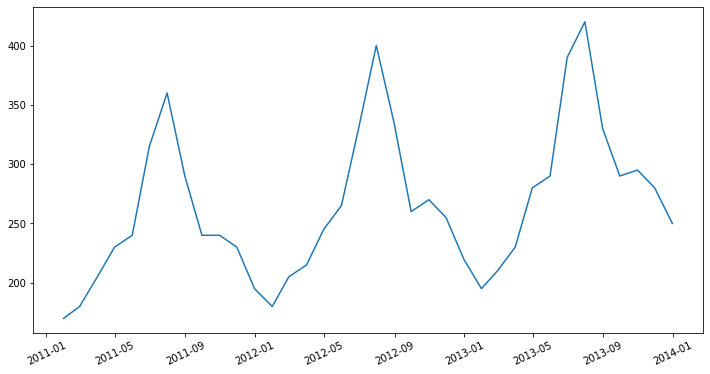

In [61]:
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.xticks(rotation=25)

# log transformation

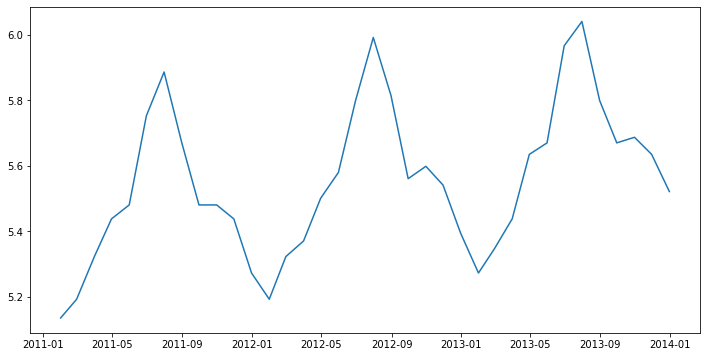

In [62]:
ts_log = np.log(ts) 
plt.figure(figsize=(12,6))
plt.plot(ts_log) # 증폭

# decompose

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
decomp = seasonal_decompose(ts)
decomp

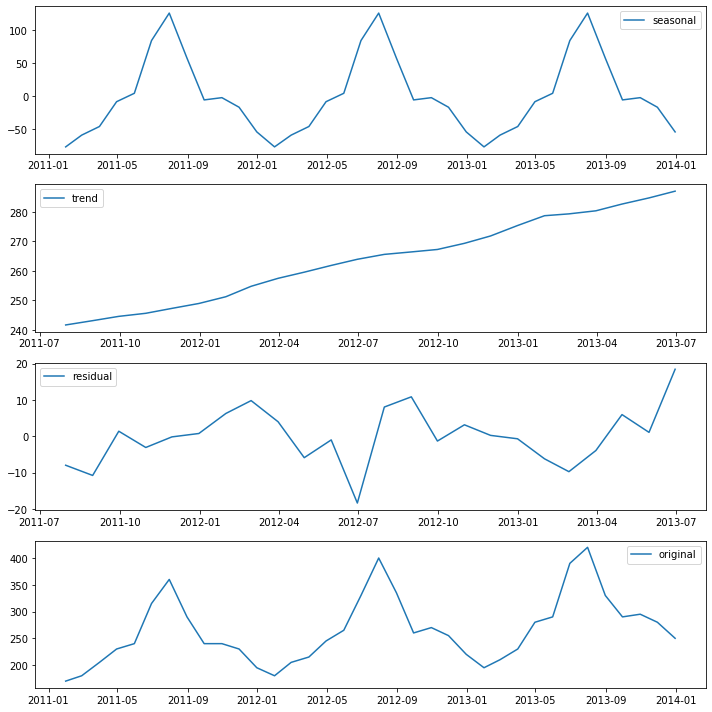

In [65]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax = ax.ravel()

ax[0].plot(decomp.seasonal, label='seasonal')
ax[0].legend(loc='best')

ax[1].plot(decomp.trend, label='trend')
ax[1].legend(loc='best')

ax[2].plot(decomp.resid, label='residual')
ax[2].legend(loc='best')

ax[3].plot(ts, label='original')
ax[3].legend(loc='best')

plt.tight_layout()

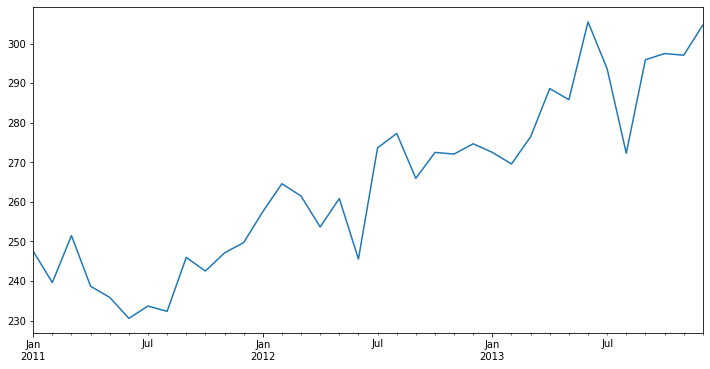

In [66]:
seasonal = decomp.seasonal
ts_adj = ts - seasonal

plt.figure(figsize=(12,6))
ts_adj.plot()

In [67]:
y = ts_adj
x = np.arange(1, len(ts_adj)+1).reshape(-1,1)
print(f'x: {x.shape}\ny: {y.shape}')

x: (36, 1)
y: (36,)


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lmfit_lawn_s=LinearRegression()
lmfit_lawn_s.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

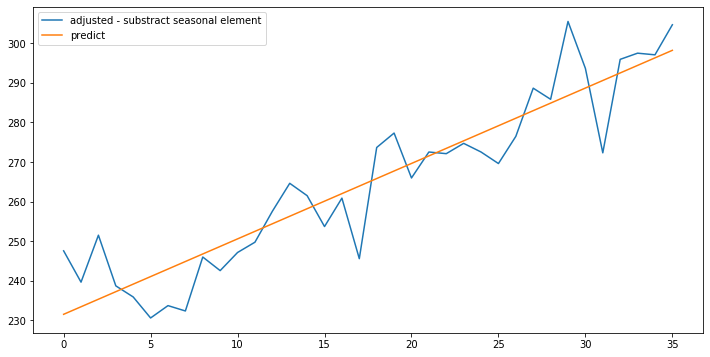

In [70]:
y_adj_pred = lmfit_lawn_s.predict(x)

plt.figure(figsize=(12,6))
plt.plot(ts_adj.values, label='adjusted - substract seasonal element')
plt.plot(y_adj_pred, label='predict')
plt.legend(loc='best')

In [71]:
y_pred = y_adj_pred + seasonal
y_pred

2011-01-31    153.948949
2011-02-28    173.773394
2011-03-31    188.806172
2011-04-30    228.526451
2011-05-31    243.246729
2011-06-30    325.467007
2011-07-31    369.249785
2011-08-31    302.511730
2011-09-30    240.773675
2011-10-31    246.118954
2011-11-30    233.443399
2011-12-31    197.747010
2012-01-31    176.842289
2012-02-29    196.666734
2012-03-31    211.699512
2012-04-30    251.419790
2012-05-31    266.140069
2012-06-30    348.360347
2012-07-31    392.143125
2012-08-31    325.405070
2012-09-30    263.667015
2012-10-31    269.012294
2012-11-30    256.336739
2012-12-31    220.640350
2013-01-31    199.735628
2013-02-28    219.560073
2013-03-31    234.592852
2013-04-30    274.313130
2013-05-31    289.033408
2013-06-30    371.253687
2013-07-31    415.036465
2013-08-31    348.298410
2013-09-30    286.560355
2013-10-31    291.905633
2013-11-30    279.230078
2013-12-31    243.533690
Freq: M, Name: sales, dtype: float64

# 2014년 예측

In [72]:
test_data = np.arange(37, 49).reshape(-1,1)
y2014 = lmfit_lawn_s.predict(test_data)+seasonal[:12]
y2014

2011-01-31    222.628968
2011-02-28    242.453413
2011-03-31    257.486192
2011-04-30    297.206470
2011-05-31    311.926748
2011-06-30    394.147026
2011-07-31    437.929805
2011-08-31    371.191750
2011-09-30    309.453695
2011-10-31    314.798973
2011-11-30    302.123418
2011-12-31    266.427030
Freq: M, Name: sales, dtype: float64

In [73]:
y2014.index = pd.date_range('1/1/2014','12/31/2014', freq='M')
y2014

2014-01-31    222.628968
2014-02-28    242.453413
2014-03-31    257.486192
2014-04-30    297.206470
2014-05-31    311.926748
2014-06-30    394.147026
2014-07-31    437.929805
2014-08-31    371.191750
2014-09-30    309.453695
2014-10-31    314.798973
2014-11-30    302.123418
2014-12-31    266.427030
Freq: M, Name: sales, dtype: float64

In [74]:
test_plus = np.arange(35,37).reshape(-1,1)
y2013 = lmfit_lawn_s.predict(test_plus)+seasonal[10:12]
y2013.index = pd.date_range('11/1/2013','12/31/2013', freq='M')
y2013

2013-11-30    279.230078
2013-12-31    243.533690
Freq: M, Name: sales, dtype: float64

In [75]:
plus = pd.concat([y2013,y2014],axis=0)
plus

2013-11-30    279.230078
2013-12-31    243.533690
2014-01-31    222.628968
2014-02-28    242.453413
2014-03-31    257.486192
2014-04-30    297.206470
2014-05-31    311.926748
2014-06-30    394.147026
2014-07-31    437.929805
2014-08-31    371.191750
2014-09-30    309.453695
2014-10-31    314.798973
2014-11-30    302.123418
2014-12-31    266.427030
Name: sales, dtype: float64

# y_pred / y_adj_pred 데이터 형식을 DF 로 맞춰준다.

In [76]:
y_adj_pred = pd.DataFrame(y_adj_pred)
y_pred = pd.DataFrame(y_pred)

## index를  t ( 미리 설정한 pd.date_range 값으로)로 맞춰준다.

In [77]:
y_adj_pred.index=t
y_pred.index=t

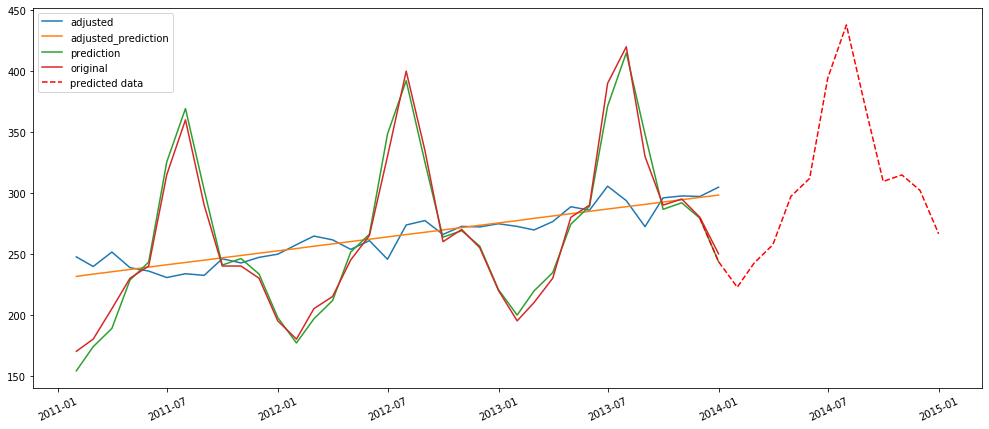

In [78]:
plt.figure(figsize=(17,7))

plt.plot(ts_adj, label='adjusted')
plt.plot(y_adj_pred, label='adjusted_prediction')
plt.plot(y_pred, label='prediction')
plt.plot(ts, label='original')
plt.plot(plus,'r--' ,label ='predicted data')

plt.xticks(rotation=25)
plt.legend(loc='best')

# Air Passenger example

In [79]:
air = pd.read_csv('../data/AirPassengers.csv')
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


(-10, 150)

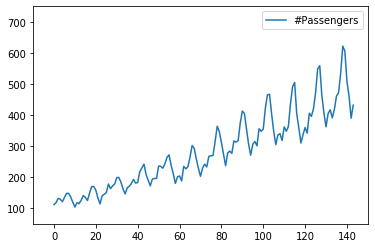

In [80]:
air.plot()
plt.ylim(50, 750)
plt.xlim(-10,150)

In [81]:
t = pd.date_range('1/1/1949', '12/31/1960',freq='M')
t

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [82]:
air.columns = ['Month','Passengers']
air

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [83]:
air.drop('Month',axis=1,inplace=True)
air

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [84]:
air.index=t
air

,Passengers
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [85]:
ts = air.Passengers
ts

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: Passengers, Length: 144, dtype: int64

# log transformation

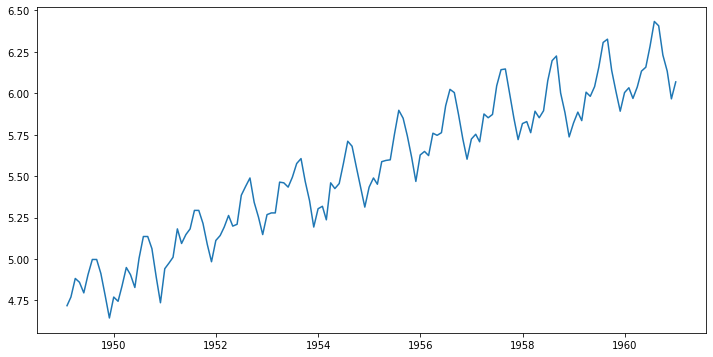

In [86]:
ts_log = np.log(ts) 
plt.figure(figsize=(12,6))
plt.plot(ts_log) # 증폭

# decompose

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_log)

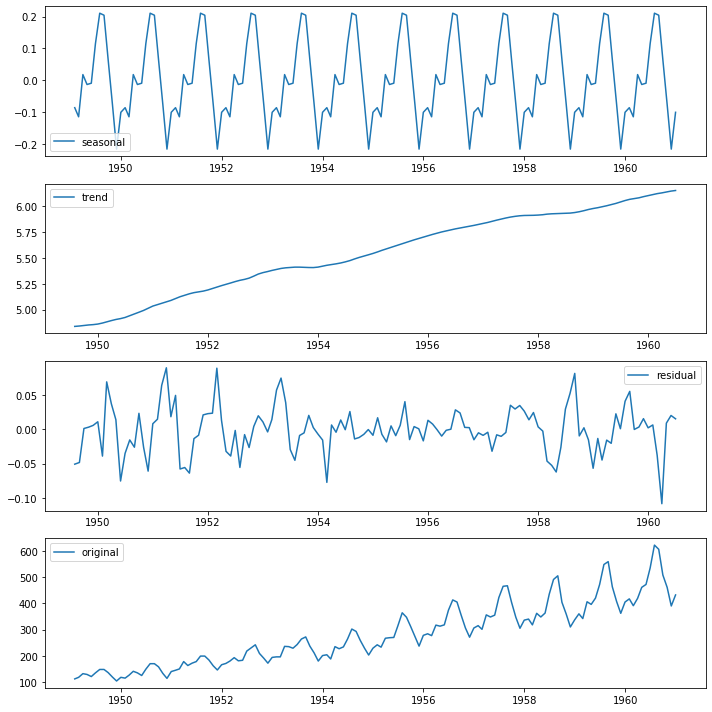

In [88]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax = ax.ravel()

ax[0].plot(decomp.seasonal, label='seasonal')
ax[0].legend(loc='best')

ax[1].plot(decomp.trend, label='trend')
ax[1].legend(loc='best')

ax[2].plot(decomp.resid, label='residual')
ax[2].legend(loc='best')

ax[3].plot(ts, label='original')
ax[3].legend(loc='best')

plt.tight_layout()

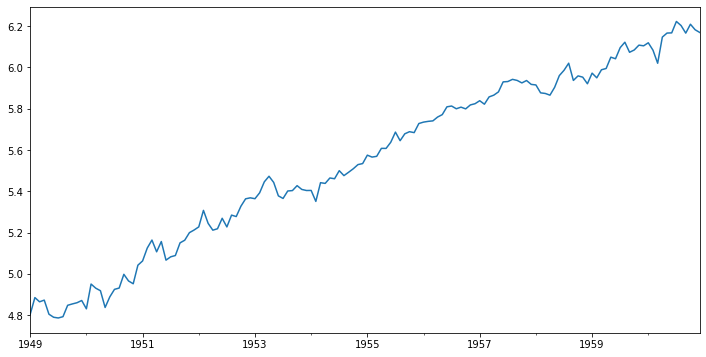

In [89]:
seasonal = decomp.seasonal
ts_adj = ts_log - seasonal

plt.figure(figsize=(12,6))
ts_adj.plot()

In [90]:
y = ts_adj
x = np.arange(1, len(ts_adj)+1).reshape(-1,1)
print(f'x: {x.shape}\ny: {y.shape}')

x: (144, 1)
y: (144,)


In [91]:
from sklearn.linear_model import LinearRegression
lmfit_air_s=LinearRegression()
lmfit_air_s.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_adj_pred = lmfit_air_s.predict(x)
y_adj_pred

array([4.82268077, 4.83274364, 4.84280651, 4.85286938, 4.86293225,
       4.87299512, 4.88305799, 4.89312086, 4.90318373, 4.9132466 ,
       4.92330947, 4.93337234, 4.94343521, 4.95349808, 4.96356095,
       4.97362382, 4.98368669, 4.99374956, 5.00381243, 5.01387529,
       5.02393816, 5.03400103, 5.0440639 , 5.05412677, 5.06418964,
       5.07425251, 5.08431538, 5.09437825, 5.10444112, 5.11450399,
       5.12456686, 5.13462973, 5.1446926 , 5.15475547, 5.16481834,
       5.17488121, 5.18494408, 5.19500695, 5.20506982, 5.21513269,
       5.22519556, 5.23525843, 5.2453213 , 5.25538417, 5.26544704,
       5.27550991, 5.28557278, 5.29563565, 5.30569852, 5.31576139,
       5.32582426, 5.33588713, 5.34595   , 5.35601287, 5.36607574,
       5.37613861, 5.38620148, 5.39626435, 5.40632722, 5.41639009,
       5.42645296, 5.43651583, 5.4465787 , 5.45664157, 5.46670444,
       5.4767673 , 5.48683017, 5.49689304, 5.50695591, 5.51701878,
       5.52708165, 5.53714452, 5.54720739, 5.55727026, 5.56733

# seasonal을 제거한 후 추세 비교

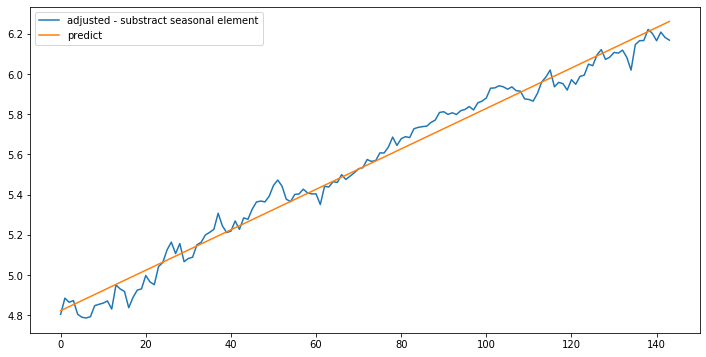

In [93]:
plt.figure(figsize=(12,6))
plt.plot(ts_adj.values, label='adjusted - substract seasonal element')
plt.plot(y_adj_pred, label='predict')
plt.legend(loc='best')

In [94]:
y_pred = np.exp(y_adj_pred + seasonal)
y_pred

1949-01-31    114.076098
1949-02-28    111.981177
1949-03-31    129.142941
1949-04-30    126.447066
1949-05-31    128.248032
                 ...    
1960-08-31    617.656247
1960-09-30    542.570966
1960-10-31    476.407768
1960-11-30    418.117572
1960-12-31    474.070513
Freq: M, Name: Passengers, Length: 144, dtype: float64

# 예측값(y_pred)와 실제값(ts) 간 비교

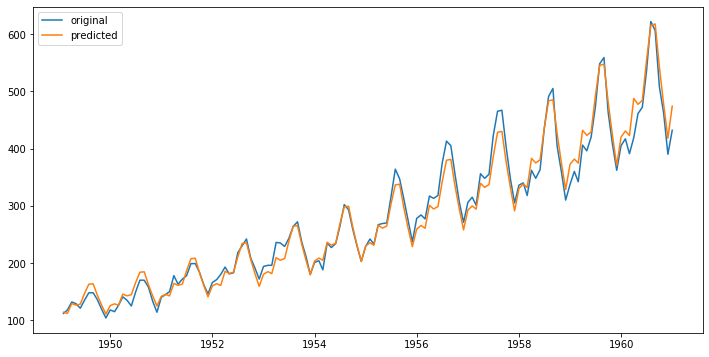

In [95]:
plt.figure(figsize=(12,6))
plt.plot(ts,label='original')
plt.plot(y_pred,label='predicted')
plt.legend(loc='best')

# 61년 예측

In [96]:
test_data = np.arange(145, 157).reshape(-1,1)
y61 = np.exp(lmfit_air_s.predict(test_data)+seasonal[:12])
y61

1949-01-31    485.859263
1949-02-28    476.936825
1949-03-31    550.030159
1949-04-30    538.548208
1949-05-31    546.218670
1949-06-30    624.806101
1949-07-31    694.316335
1949-08-31    696.931066
1949-09-30    612.208755
1949-10-31    537.553656
1949-11-30    471.782042
1949-12-31    534.916420
Freq: M, Name: Passengers, dtype: float64

In [97]:
y61.index = pd.date_range('1/1/1961','12/31/1961', freq='M')
y61

1961-01-31    485.859263
1961-02-28    476.936825
1961-03-31    550.030159
1961-04-30    538.548208
1961-05-31    546.218670
1961-06-30    624.806101
1961-07-31    694.316335
1961-08-31    696.931066
1961-09-30    612.208755
1961-10-31    537.553656
1961-11-30    471.782042
1961-12-31    534.916420
Freq: M, Name: Passengers, dtype: float64

# 60년 11월 12월 추가로 예측 -> 그래프 매끄럽게 연결하기 위해

In [98]:
test_data = np.arange(144, 145).reshape(-1,1)
y60 = np.exp(lmfit_air_s.predict(test_data)+seasonal[11:12])
y60

1949-12-31    474.070513
Freq: M, Name: Passengers, dtype: float64

In [99]:
y60.index = pd.date_range('12/1/1960','12/31/1960', freq='M')
y60

1960-12-31    474.070513
Freq: M, Name: Passengers, dtype: float64

In [100]:
y61s = pd.concat([y60,y61],axis=0)
y61s

1960-12-31    474.070513
1961-01-31    485.859263
1961-02-28    476.936825
1961-03-31    550.030159
1961-04-30    538.548208
1961-05-31    546.218670
1961-06-30    624.806101
1961-07-31    694.316335
1961-08-31    696.931066
1961-09-30    612.208755
1961-10-31    537.553656
1961-11-30    471.782042
1961-12-31    534.916420
Name: Passengers, dtype: float64

# y_pred / y_adj_pred 데이터 형식을 DF 로 맞춰준다.

In [106]:
y_adj_pred = pd.DataFrame(y_adj_pred)
y_pred = pd.DataFrame(y_pred)

# index를 t ( 미리 설정한 pd.date_range 값으로)로 맞춰준다.

In [107]:
y_adj_pred.index=t
y_pred.index=t

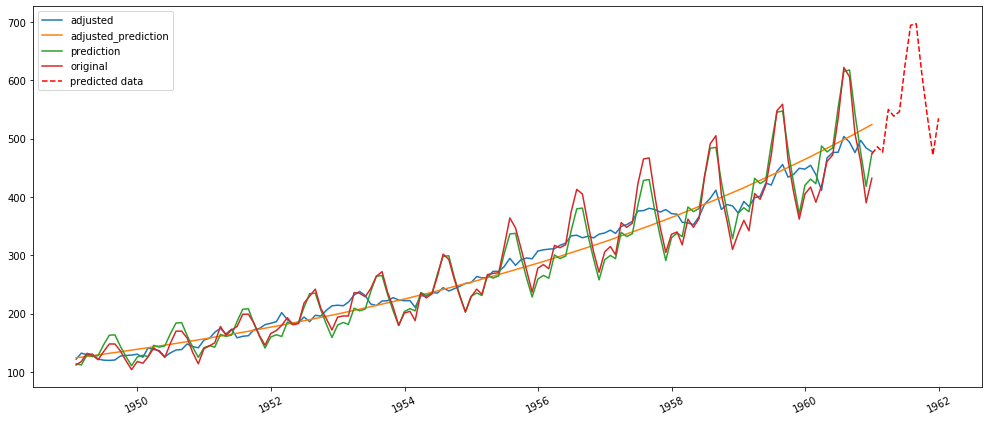

In [111]:
plt.figure(figsize=(17,7))

plt.plot(np.exp(ts_adj), label='adjusted')
plt.plot(np.exp(y_adj_pred),label='adjusted_prediction')
plt.plot(y_pred,label='prediction')
plt.plot(ts, label='original')
plt.plot(y61s,'r--' ,label ='predicted data')

plt.xticks(rotation=25)
plt.legend(loc='best')

# mse

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [103]:
np.sqrt(mean_squared_error(ts, y_pred))

16.720241967703036

In [104]:
mean_absolute_error(ts, y_pred)

12.963550324718746